In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import prince
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random
import csv

/Users/matthewong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/matthewong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [33]:
artifical = ["AAACFCCDA",'ACCDGCDEA','AAAEHCCFA','ACCFICDDA','AAACFCCCA','ACCDGCDFA','AAAEHCCDA','ACCFICDEA','AAACFCCFA','ACCDGCDDA','CDAFCCDAH','CECGDCFGL','CDAHFCDAK','CECFGCFGL','CDAHDCFNM','CECHDCFNG','CDAFFCDAP','CECGGCFGQ','CDAHCDAHR','CECFDCFGS']
art_labels = ["Group 1","Group 1","Group 1","Group 1","Group 1","Group 1","Group 1","Group 1","Group 1","Group 1","Group 2","Group 2","Group 2","Group 2","Group 2","Group 2","Group 2","Group 2","Group 2","Group 2",]

def fasta_input_labeled(fasta,label):
    with open(fasta, 'r') as file:
        seqs = file.read().split('>')[1:]
    labels = []
    for i in range(len(seqs)):
        if label in seqs[i]:
            temp_label = "Group 1"
        else:
            temp_label = "Group 2"
        seqs[i] = seqs[i][seqs[i].find('\n')+1:].replace('\n', '')
        labels.append(temp_label)

    return pd.DataFrame({'Sequence': seqs, 'Label': labels})

art_sequences = pd.DataFrame({'Sequence': artifical, 'Label': art_labels})
mamvert_sequences = fasta_input_labeled('mamVert.fas', label = 'Mammals')
hexapeptide_sequences = pd.read_csv('hexapeptides_labled.csv')
feline_sequences = fasta_input_labeled('feline.txt', label = 'VSD_')



In [27]:
Vfactor_conversion = {
    'X' : [0,0,0,0,0],
    '-' : [0,0,0,0,0],
    'A': [-0.591, -1.302, -0.733, 1.570, -0.146],
    'C': [-1.343, 0.465, -0.862, -1.020, -0.255],
    'D': [1.050, 0.302, -3.656, -0.259, -3.242],
    'E': [1.357, -1.453, 1.477, 0.113, -0.837],
    'F': [-1.006, -0.590, 1.891, -0.397, 0.412],
    'G': [-0.384, 1.652, 1.330, 1.045, 2.064],
    'H': [0.336, -0.417, -1.673, -1.474, -0.078],
    'I': [-1.239, -0.547, 2.131, 0.393, 0.816],
    'K': [1.831, -0.561, 0.533, -0.277, 1.648],
    'L': [-1.019, -0.987, -1.505, 1.266, -0.912],
    'M': [-0.663, -1.524, 2.219, -1.005, 1.212],
    'N': [0.945, 0.828, 1.299, -0.169, 0.933],
    'P': [0.189, 2.081, -1.628, 0.421, -1.392],
    'Q': [0.931, -0.179, -3.005, -0.503, -1.853],
    'R': [1.538, -0.055, 1.502, 0.440, 2.897],
    'S': [-0.228, 1.399, -4.760, 0.670, -2.647],
    'T': [-0.032, 0.326, 2.213, 0.908, 1.313],
    'V': [-1.337, -0.279, -0.544, 1.242, -1.262],
    'W': [-0.595, 0.009, 0.672, -2.128, -0.184],
    'Y': [0.260, 0.830, 3.097, -0.838, 1.512],
}

binary_conversion = {
    'A': [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'C': [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'D': [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'E': [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'F': [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'G': [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'H': [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'I': [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    'K': [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    'L': [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    'M': [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    'N': [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    'P': [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    'Q': [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    'R': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    'S': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    'T': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    'V': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    'W': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    'Y': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    '-': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'X': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
}

IX_conversion = {
    'X' : [0,0,0,0,0,0,0,0,0,0],
    '-' : [0,0,0,0,0,0,0,0,0,1],
    'A':[1,	0	,0	,0,	0,	1,	0,	0	,0,	0],
    'C': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'D': [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    'E': [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    'F': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'G': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'H': [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    'K': [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    'I': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'L': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'M': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'N': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'P': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    'Q': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'R': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    'S': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'T': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'V': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    'W': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    'Y': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
}

In [28]:
def binary_conv(sequences, labels = pd.DataFrame()):
    binary = []
    for seq in sequences:
        binary_seq = []
        for aa in seq:
            binary_seq = binary_seq + binary_conversion[aa]
        binary.append(binary_seq)
    
    converted = pd.DataFrame(binary,columns = 
                             ["Position " + 
                              str(i) for i in range(1,len(binary[1]) + 1)])
    if labels.empty == False:
        converted["Labels"] = labels
    return converted



def Vfactor_conv(sequences, labels = pd.DataFrame()):
    
    Vfactor = []
    for seq in sequences:
        Vfactor_seq = []
        for aa in seq:
            Vfactor_seq = Vfactor_seq + Vfactor_conversion[aa]
        Vfactor.append(Vfactor_seq)

    seq_length = int(len(Vfactor[1])/5)

    positions = []
    for i in range(1,seq_length + 1):
        positions.append("Position " + str(i) + "I")
        positions.append("Position " + str(i) + "II")
        positions.append("Position " + str(i) + "III")
        positions.append("Position " + str(i) + "IV")
        positions.append("Position " + str(i) + "V")

    converted = pd.DataFrame(Vfactor,columns = positions)

    if labels.empty == False:
        converted["Labels"] = labels
        return converted
    
    return converted


def IXfactor_conv(sequences, labels = pd.DataFrame()):
    IXfactor = []
    for seq in sequences:
        IXfactor_seq = []
        for aa in seq:
            IXfactor_seq = IXfactor_seq + IX_conversion[aa]
        IXfactor.append(IXfactor_seq)

    seq_length = int(len(IXfactor[1])/10)

    positions = []
    for i in range(1,seq_length + 1):
        positions.append("Position " + str(i) + "I")
        positions.append("Position " + str(i) + "II")
        positions.append("Position " + str(i) + "III")
        positions.append("Position " + str(i) + "IV")
        positions.append("Position " + str(i) + "V")
        positions.append("Position " + str(i) + "VI")
        positions.append("Position " + str(i) + "VII") 
        positions.append("Position " + str(i) + "VIII")
        positions.append("Position " + str(i) + "IX")
        positions.append("Position " + str(i) + "X")
    
    converted = pd.DataFrame(IXfactor,columns = positions)

    if labels.empty == False:
        converted["Labels"] = labels
        return converted
    
    return converted



def variability_conv(seqs,labels = pd.DataFrame):
    var_coded = [[0 
                  for i in range(len(seqs[1]))] 
                  for j in range(len(seqs))]
    coder = {}

    for position in range(len(seqs[1])):
        
        #making the dictionary
        for protein in range(len(seqs)):
            if seqs[protein][position] == '-':
                coder[seqs[protein][position]] = 0
            elif seqs[protein][position] in coder.keys():
                coder[seqs[protein][position]] += 1
            else:
                coder[seqs[protein][position]] = 1

        coder = sorted(coder.items(), key=lambda x:x[1], 
                       reverse=False)
        coder = dict(coder)
        
        for i, key in enumerate(coder):
            coder[key] = i
        
        #filling in the matrix
        for protein in range(len(seqs)):
            var_coded[protein][position] = coder.get(
                seqs[protein][position])

        coder.clear()
    
    positions = []
    for i in range(1,len(var_coded[1]) + 1):
        positions.append("Position " + str(i))
    
    converted = pd.DataFrame(var_coded,columns = positions)

    if labels.empty == False:
        converted["Labels"] = labels
    return converted
    
    


In [55]:
#functions for PCA and MCA
def pca_prince(dataframe ,label1 ,label2, component1 = 1, component2 = 2,remove_outliers = True):
    pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
    )

    dataframe_unlabeled = dataframe.drop(columns = ['Labels'])

    pca = pca.fit(dataframe_unlabeled)
    data = pca.row_coordinates(dataframe_unlabeled)

    if remove_outliers == True:
        upper_PC1 = data.quantile(.95)[component1-1]
        lower_PC1 = data.quantile(.05)[component1-1]
        upper_PC2 = data.quantile(.95)[component2-1]
        lower_PC2 = data.quantile(.05)[component2-1]

        outliers = []
        for i in range(len(data)):
            if data[component1-1][i] > upper_PC1 or data[component1-1][i] < lower_PC1:
                outliers.append(i)
            elif data[component2-1][i] > upper_PC2 or data[component2-1][i] < lower_PC2:
                outliers.append(i)

        dataframe_new = dataframe.drop(outliers)
        dataframe_new_unlabeled = dataframe_new.drop(columns = ['Labels'])

        pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
        )

        pca = pca.fit(dataframe_new_unlabeled)
        data = pca.row_coordinates(dataframe_new_unlabeled)
        
        data.insert(component2,"Group",dataframe_new["Labels"])
    else:
        data.insert(component2,"Group",dataframe["Labels"])

    colors = {label1: '#E66100', label2: '#5D3A9B'}
    color_list = [colors[group] for group in data['Group']]

    variances = pca.eigenvalues_summary["% of variance"]

    data.plot.scatter(x=component1-1,y=component2-1,c=color_list, grid = False,
                      xlabel = "PC" + str(component1) + " (" +variances[component1-1] + ")",
                      ylabel = "PC" + str(component2) + " (" +variances[component2-1]+ ")")
    handles, labels = plt.gca().get_legend_handles_labels()

    #define patches and lines to add to legend
    patch1 = mpatches.Patch(color='#E66100', label="VSD")
    patch2 = mpatches.Patch(color='#5D3A9B', label="ORD")   
    handles.extend([patch1, patch2])
    plt.legend(handles=handles)
    



def mca_prince(dataframe, label1, label2, component1 = 1, component2 = 2,remove_outliers = True):
    mca = prince.MCA(
        n_components= component1 + component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
    )

    dataframe_unlabeled = dataframe.drop(columns = ['Labels'])

    mca = mca.fit(dataframe_unlabeled)
    data = mca.row_coordinates(dataframe_unlabeled)

    if remove_outliers == True:
        upper_PC1 = data.quantile(.95)[component1-1]
        lower_PC1 = data.quantile(.05)[component1-1]
        upper_PC2 = data.quantile(.95)[component2-1]
        lower_PC2 = data.quantile(.05)[component2-1]

        outliers = []
        for i in range(len(data)):
            if data[component1-1][i] > upper_PC1 or data[component1-1][i] < lower_PC1:
                outliers.append(i)
            elif data[component2-1][i] > upper_PC2 or data[component2-1][i] < lower_PC2:
                outliers.append(i)

        dataframe_new = dataframe.drop(outliers)
        dataframe_new_unlabeled = dataframe_new.drop(columns = ['Labels'])

        mca = prince.MCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
        )

        mca = mca.fit(dataframe_new_unlabeled)
        data = mca.row_coordinates(dataframe_new_unlabeled)


    data.insert(component2,"Group",dataframe["Labels"])


    colors = {label1: '#E66100', label2: '#5D3A9B'}
    color_list = [colors[group] for group in data['Group']]

    variances = mca.eigenvalues_summary["% of variance"]

    data.plot.scatter(x=component1-1,y=component2-1,c=color_list, grid = False,
                      xlabel = "Dimension " + str(component1) + " (" +variances[component1-1] + ")",
                      ylabel = "Dimension " + str(component2) + " (" +variances[component2-1]+ ")")
    handles, labels = plt.gca().get_legend_handles_labels()

    #define patches and lines to add to legend
    patch1 = mpatches.Patch(color='#E66100', label="VSD")
    patch2 = mpatches.Patch(color='#5D3A9B', label="ORD")   
    handles.extend([patch1, patch2])
    plt.legend(handles=handles)



def scale_column(column):
    max = column.max()
    min = column.min()

    scaled = []
    for value in column:
        if value == 0:
            scaled.append(0)
        elif value < 0:
            scaled.append(value/min)
        else:  
            scaled.append(value/max)

    return scaled

def adjust(value):
    if value >= 0:
        return value + 0.02
    else:
        return value - 0.02

def pca_prince_biplot(dataframe ,component1 = 1, component2 = 2,remove_outliers = True,factors = 5,percentile =0.95):
    pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
    )

    dataframe_unlabeled = dataframe.drop(columns = ['Labels'])
    pca = pca.fit(dataframe_unlabeled)
    
    if remove_outliers == True:
        data = pca.row_coordinates(dataframe_unlabeled)
        upper_PC1 = data.quantile(0.95)[component1-1]
        lower_PC1 = data.quantile(0.05)[component1-1]
        upper_PC2 = data.quantile(0.95)[component2-1]
        lower_PC2 = data.quantile(0.05)[component2-1]

        outliers = []
        for i in range(len(data)):
            if data[component1-1][i] > upper_PC1 or data[component1-1][i] < lower_PC1:
                outliers.append(i)
            elif data[component2-1][i] > upper_PC2 or data[component2-1][i] < lower_PC2:
                outliers.append(i)

        dataframe_new = dataframe.drop(outliers)
        dataframe_new_unlabeled = dataframe_new.drop(columns = ['Labels'])

        pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
        )
        pca = pca.fit(dataframe_new_unlabeled)

    contributions = pca.column_coordinates_
    #contributions = contributions.apply(scale_column)
    display(contributions.sort_values(by = component1-1))
    display(contributions.sort_values(by = component2-1))

    pc1_95 = contributions.quantile(percentile)[component1-1]
    pc2_95 = contributions.quantile(percentile)[component2-1]
    pc1_5 = contributions.quantile(1-percentile)[component1-1]
    pc2_5 = contributions.quantile(1-percentile)[component2-1]


    roman_numerals = {
        1: "I",
        2: "II",
        3: "III",
        4: "IV",
        5: "V",
        6: "VI",
        7: "VII",
        8: "VIII",
        9: "IX",
        10: "X"
    }
    
    for i in range(len(contributions)):
        label = str(int(i/factors)+1) + roman_numerals[i%factors + 1]
        if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
            
            plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
            plt.text(adjust(contributions[component1-1][i]),adjust(contributions[component2-1][i]), label, color = 'g', ha = 'center', va = 'center',fontsize = 5)
    plt.xlabel("PC" + str(component1))
    plt.ylabel("PC" + str(component2))
    
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.rcParams['figure.dpi'] = 500
    plt.show()

def pca_prince_biplot_var(dataframe ,component1 = 1, component2 = 2,remove_outliers = True,percentile =0.95):
    pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
    )

    dataframe_unlabeled = dataframe.drop(columns = ['Labels'])

    pca = pca.fit(dataframe_unlabeled)
    

    if remove_outliers == True:
        data = pca.row_coordinates(dataframe_unlabeled)
    
        #need a better outlier detection method
        upper_PC1 = data.quantile(0.95)[component1-1]
        lower_PC1 = data.quantile(0.05)[component1-1]
        upper_PC2 = data.quantile(0.95)[component2-1]
        lower_PC2 = data.quantile(0.05)[component2-1]


        outliers = []
        for i in range(len(data)):
            if data[component1-1][i] > upper_PC1 or data[component1-1][i] < lower_PC1:
                outliers.append(i)
            elif data[component2-1][i] > upper_PC2 or data[component2-1][i] < lower_PC2:
                outliers.append(i)

        
        dataframe_new = dataframe.drop(outliers)
        dataframe_new_unlabeled = dataframe_new.drop(columns = ['Labels'])

        pca = prince.PCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
        )
        pca = pca.fit(dataframe_new_unlabeled)

    

    contributions = pca.column_coordinates_
    #contributions = contributions.apply(scale_column)
    display(contributions.sort_values(by = component1-1))
    display(contributions.sort_values(by = component2-1))

    
    pc1_95 = contributions.quantile(percentile)[component1-1]
    pc2_95 = contributions.quantile(percentile)[component2-1]
    pc1_5 = contributions.quantile(1-percentile)[component1-1]
    pc2_5 = contributions.quantile(1-percentile)[component2-1]


    roman_numerals = {
        1: "I",
        2: "II",
        3: "III",
        4: "IV",
        5: "V",
        6: "VI",
        7: "VII",
        8: "VIII",
        9: "IX",
        10: "X"
    }
    
    for i in range(len(contributions)):
        label = str(i+1)
        if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
            
            plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
            plt.text(adjust(contributions[component1-1][i]),adjust(contributions[component2-1][i]), label, color = 'g', ha = 'center', va = 'center',fontsize = 5)
    plt.xlabel("PC" + str(component1))
    plt.ylabel("PC" + str(component2))
    plt.ylim(-0.75,0.75)
    plt.xlim(-0.75,0.75)
    plt.rcParams['figure.dpi'] = 500
    plt.show()


def mca_prince_biplot(dataframe ,component1 = 1, component2 = 2,remove_outliers = True,factors = 5,percentile = 0.95):
    mca = prince.MCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
    )

    dataframe_unlabeled = dataframe.drop(columns = ['Labels'])
    mca = mca.fit(dataframe_unlabeled)
    

    if remove_outliers == True:
        data = mca.row_coordinates(dataframe_unlabeled)
    
        #need a better outlier detection method
        upper_PC1 = data.quantile(.95)[component1-1]
        lower_PC1 = data.quantile(.05)[component1-1]
        upper_PC2 = data.quantile(.95)[component2-1]
        lower_PC2 = data.quantile(.05)[component2-1]


        outliers = []
        for i in range(len(data)):
            if data[component1-1][i] > upper_PC1 or data[component1-1][i] < lower_PC1:
                outliers.append(i)
            elif data[component2-1][i] > upper_PC2 or data[component2-1][i] < lower_PC2:
                outliers.append(i)

        
        dataframe_new = dataframe.drop(outliers)
        dataframe_new_unlabeled = dataframe_new.drop(columns = ['Labels'])

        mca = prince.MCA(
        n_components= component2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=47
        )
        mca = mca.fit(dataframe_new_unlabeled)
        contributions = mca.column_coordinates(dataframe_new_unlabeled)
    else:
        contributions = mca.column_coordinates(dataframe_unlabeled)

    
    pc1_95 = contributions.quantile(.99)[component1-1]
    pc2_95 = contributions.quantile(.99)[component2-1]
    pc1_5 = contributions.quantile(.01)[component1-1]
    pc2_5 = contributions.quantile(.01)[component2-1]


    roman_numerals = {
        1: "I",
        2: "II",
        3: "III",
        4: "IV",
        5: "V",
        6: "VI",
        7: "VII",
        8: "VIII",
        9: "IX",
        10: "X"
    }

    

    for i in range(len(contributions)):
        label = str(int(i/factors)+1) + roman_numerals[i%factors + 1]
        if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
            
            plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
            plt.text(adjust(contributions[component1-1][i]),adjust(contributions[component2-1][i]), label, color = 'g', ha = 'center', va = 'center',fontsize = 5)
            
    plt.xlabel("PC" + str(component1))
    plt.ylabel("PC" + str(component2))
    plt.rcParams['figure.dpi'] = 500
    plt.show()


In [16]:
art_IX = IXfactor_conv(art_sequences["Sequence"],art_sequences["Label"])
art_V = Vfactor_conv(art_sequences["Sequence"],art_sequences["Label"])
art_bin = binary_conv(art_sequences["Sequence"],art_sequences["Label"])
art_var = variability_conv(art_sequences["Sequence"],art_sequences["Label"])

,Sequence,Label
0,----------------------------------------------...,Group 1
1,----------------------------------------------...,Group 1
2,----------------------------------------------...,Group 1
3,----------------------------------------------...,Group 1
4,----------------------------------------------...,Group 1
...,...,...
215,----------------------------------------------...,Group 2
216,----------------------------------------------...,Group 2
217,----------------------------------------------...,Group 2
218,----------------------------------------------...,Group 2


In [32]:
display(mamvert_sequences)

for seq in mamvert_sequences["Sequence"]:
    if " " in seq:
        print(seq)

,Sequence,Label
0,----------------------------------------------...,Group 1
1,----------------------------------------------...,Group 1
2,----------------------------------------------...,Group 1
3,----------------------------------------------...,Group 1
4,----------------------------------------------...,Group 1
...,...,...
215,----------------------------------------------...,Group 2
216,----------------------------------------------...,Group 2
217,----------------------------------------------...,Group 2
218,----------------------------------------------...,Group 2


----------------------------------------------------------------------------------------MKLFVSEGNPHCLKV--------LAVLELTG---VKCDVQH-VNHE-----------------EKVVPFLSRT-----------VLPALLLPTE-DYL----FSTN------------------------------AIC------QYLSETS  GLGT-------GED--SSQWLEWEATELQ---------------PAVMQALHMMVLHGKAA--------------HASQALEGPLGYLEQSLSKR-NMLF----LTAET----VAVTDVILWAALYPVLTGSLLQ-----------AGELKAVRAWFE----RVN-LLPACETALQKVFKSKELD--VLKGFLHKQPNPLIQQKDN---------------------QSCNQPEQMEHMMTPEEIEIVAETWSRGLH-SCQEVPERQHPILPQEGKRNILLTSALPYVNNVPHLGNII--GCVLSADVFARYGRLRG----------WNLLYICGTDEYGTATENKAREEGLTPQQICDKYHAVHSSIYRWFQIDFDFFGRTTTQRQTEISQNIFWRLHERGFLLEDTVEQLRCENCERFLADRFVEGVCPHCHYPEARGDQCDKCGRLINAVEL-----------------------------KEPQCKVCR---QTPVIRSSKHLFLDLPK--LESDLEQWLDHSMSSGDWTGNARHI--------------------TRSWLRDGLKPRCITR--D-LQWG----TSV-----PHPDFSEKVFYVWFDAPIGYLSITANYTDQWERWW-KNPQQ-VELYNFMAKDNVPFHSVVFPCSLLGAQDNYTLVSHLVATEYLNYEDTKFSKSRGVGVFGDMAKDTGIPSDIWRFYLLYVRPEGQDSAFSWADMALKNNSELLNNLGNFIN-R---AGMF-

In [34]:
mamvert_IX = IXfactor_conv(mamvert_sequences["Sequence"],mamvert_sequences["Label"])
mamvert_V = Vfactor_conv(mamvert_sequences["Sequence"],mamvert_sequences["Label"])
mamvert_bin = binary_conv(mamvert_sequences["Sequence"],mamvert_sequences["Label"])
mamvert_var = variability_conv(mamvert_sequences["Sequence"],mamvert_sequences["Label"])
                               
hexapeptide_IX = IXfactor_conv(hexapeptide_sequences["Sequence"],hexapeptide_sequences["Classification"])
hexapeptide_V = Vfactor_conv(hexapeptide_sequences["Sequence"],hexapeptide_sequences["Classification"])
hexapeptide_bin = binary_conv(hexapeptide_sequences["Sequence"],hexapeptide_sequences["Classification"])
hexapeptide_var = variability_conv(hexapeptide_sequences["Sequence"],hexapeptide_sequences["Classification"])

feline_IX = IXfactor_conv(feline_sequences["Sequence"],feline_sequences["Label"])
feline_V = Vfactor_conv(feline_sequences["Sequence"],feline_sequences["Label"])
feline_bin = binary_conv(feline_sequences["Sequence"],feline_sequences["Label"])
feline_var = variability_conv(feline_sequences["Sequence"],feline_sequences["Label"])


component,0,1
variable,,
Position 4V,-0.589541,-0.137751
Position 4I,-0.483928,-0.121091
Position 4III,-0.460980,-0.121643
Position 2II,-0.399040,0.056108
Position 4II,-0.389321,0.080848
Position 1I,-0.371878,-0.169758
Position 6V,-0.296092,0.441740
Position 2I,-0.280787,0.376054
Position 6I,-0.280470,0.424541


component,0,1
variable,,
Position 1V,-0.224120,-0.603585
Position 1III,-0.211035,-0.540603
Position 2III,-0.058158,-0.515885
Position 2V,-0.074577,-0.494499
Position 6IV,0.305925,-0.311638
Position 2IV,0.381736,-0.220898
Position 1I,-0.371878,-0.169758
Position 5IV,-0.063197,-0.163263
Position 4V,-0.589541,-0.137751


/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:220: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:222: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:223: Future

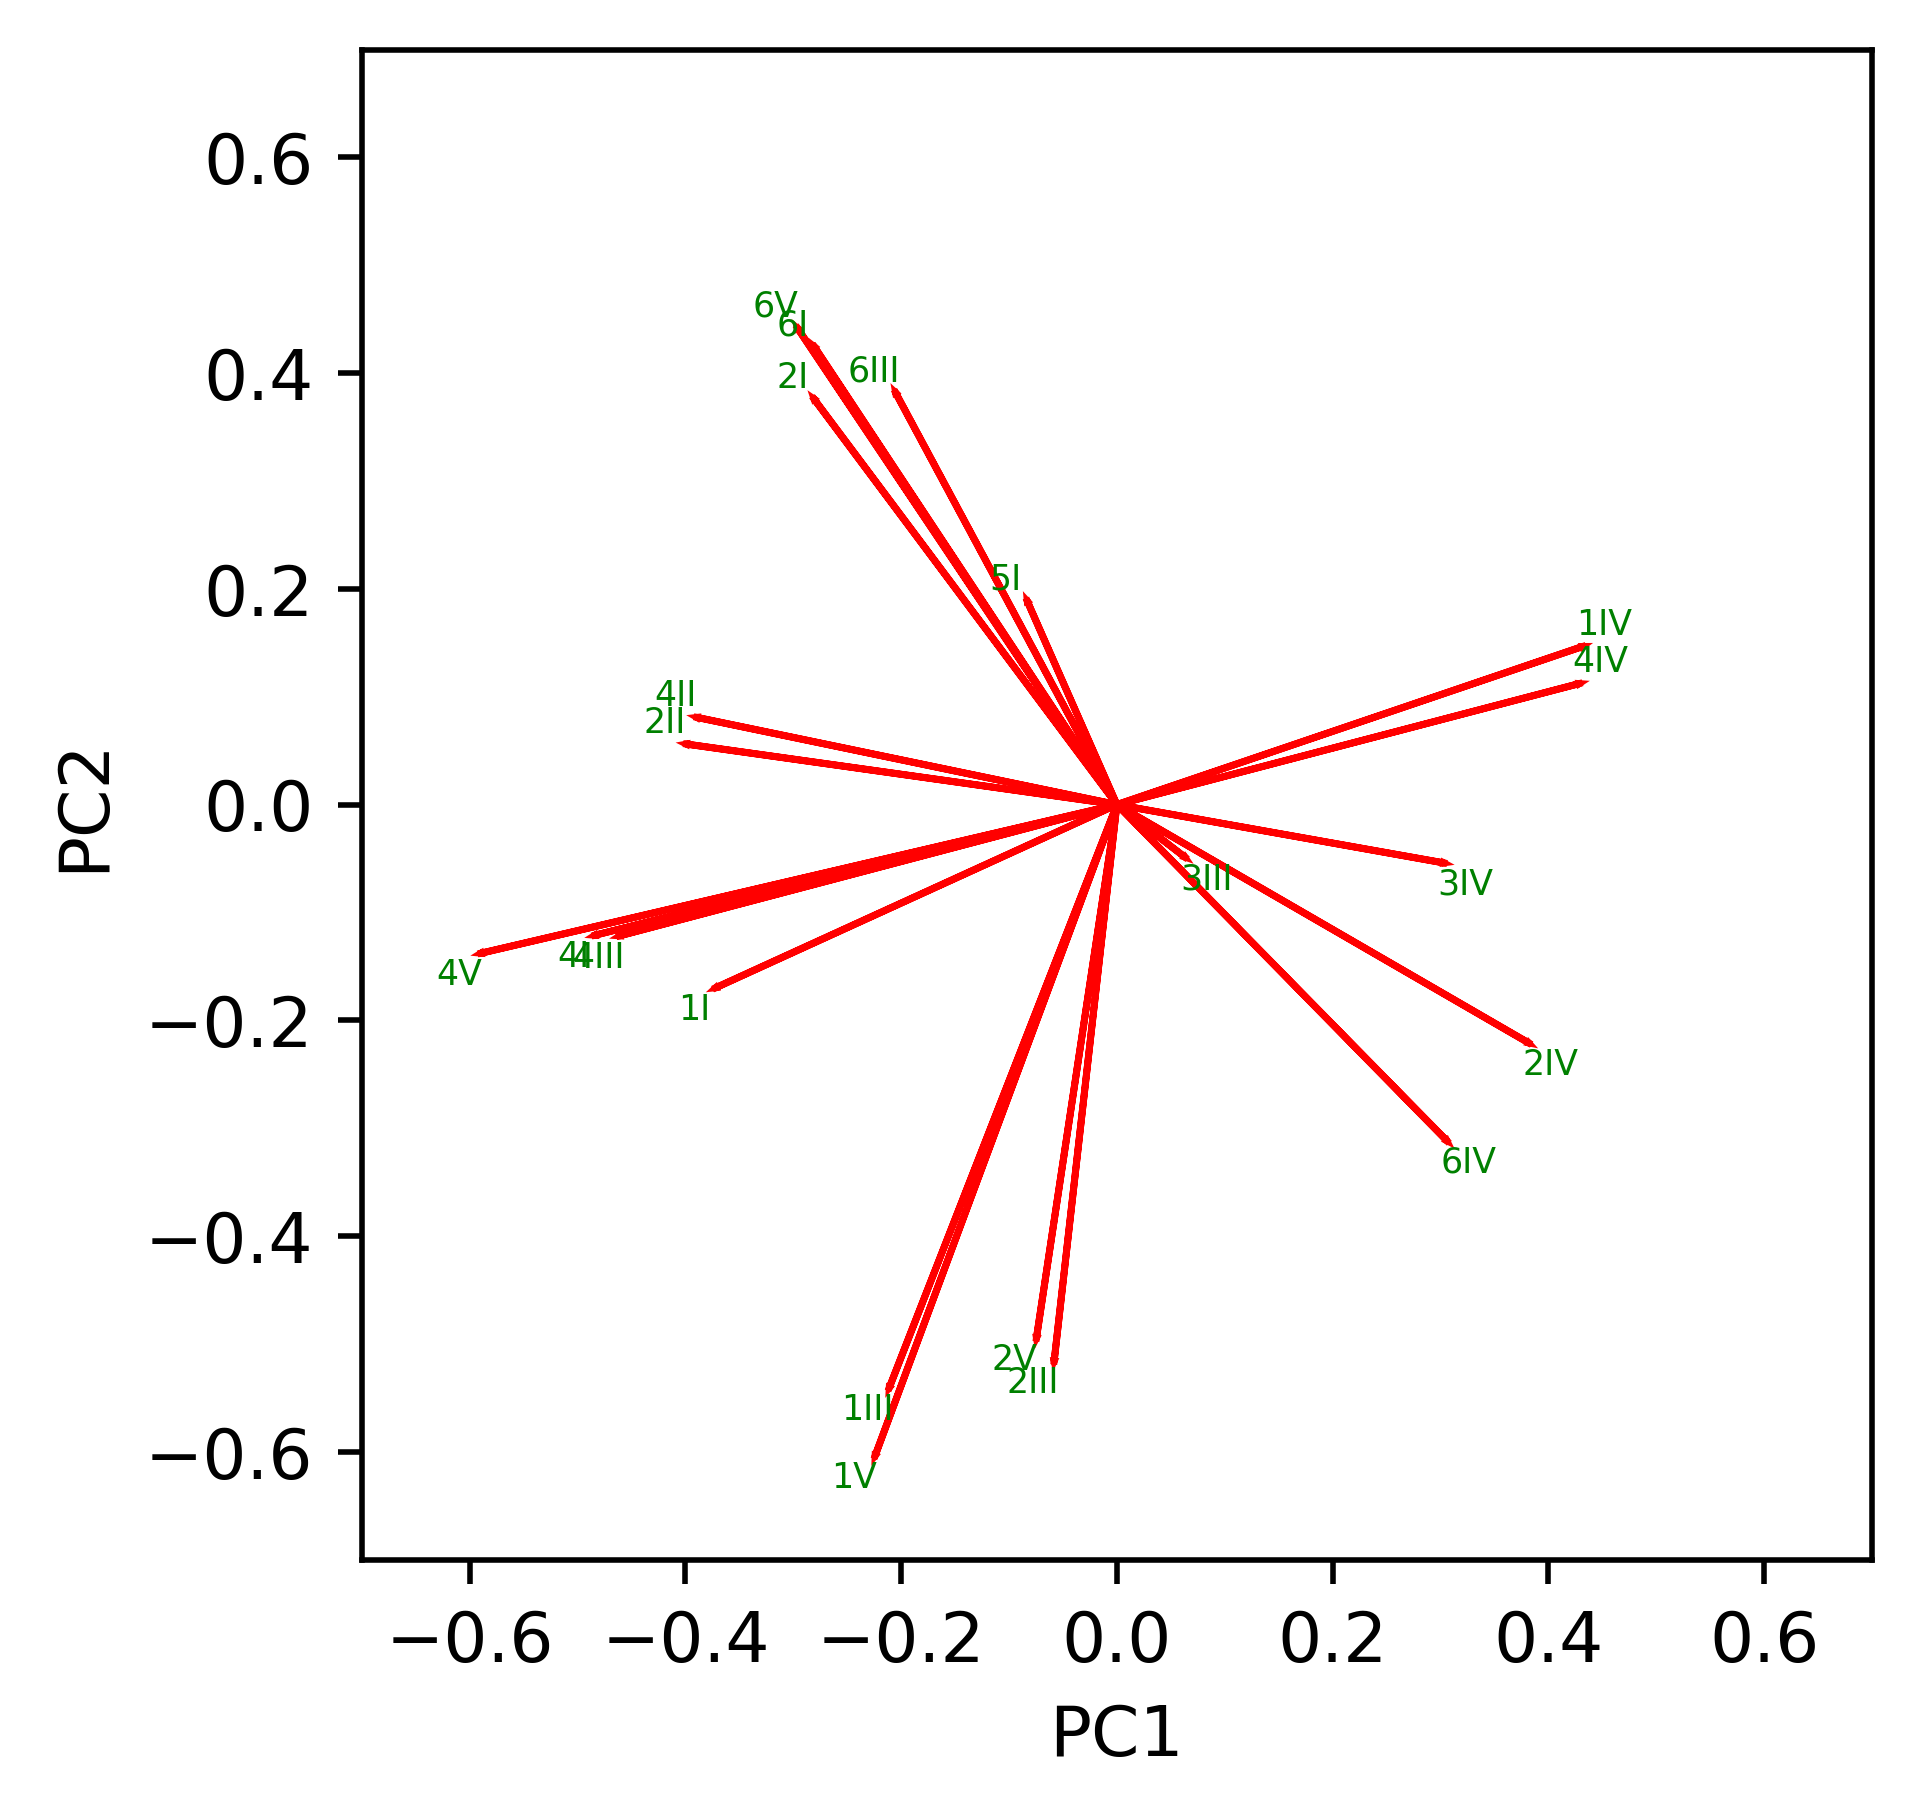

component,0,1
variable,,
Position 13V,-0.759206,-0.109980
Position 13I,-0.757107,-0.077446
Position 23IV,-0.755504,-0.003804
Position 13III,-0.753130,-0.116513
Position 13II,-0.731042,-0.053816
...,...,...
Position 27V,0.681237,0.135171
Position 27I,0.694294,0.104431
Position 27III,0.716986,0.130018


component,0,1
variable,,
Position 78IV,0.355833,-0.716361
Position 78II,0.291637,-0.667278
Position 84III,0.086660,-0.616236
Position 67II,0.208212,-0.611114
Position 84V,-0.013303,-0.595766
...,...,...
Position 89IV,0.343828,0.594514
Position 72III,-0.315650,0.629311
Position 83I,0.303152,0.634152


/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:220: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:222: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:223: Future

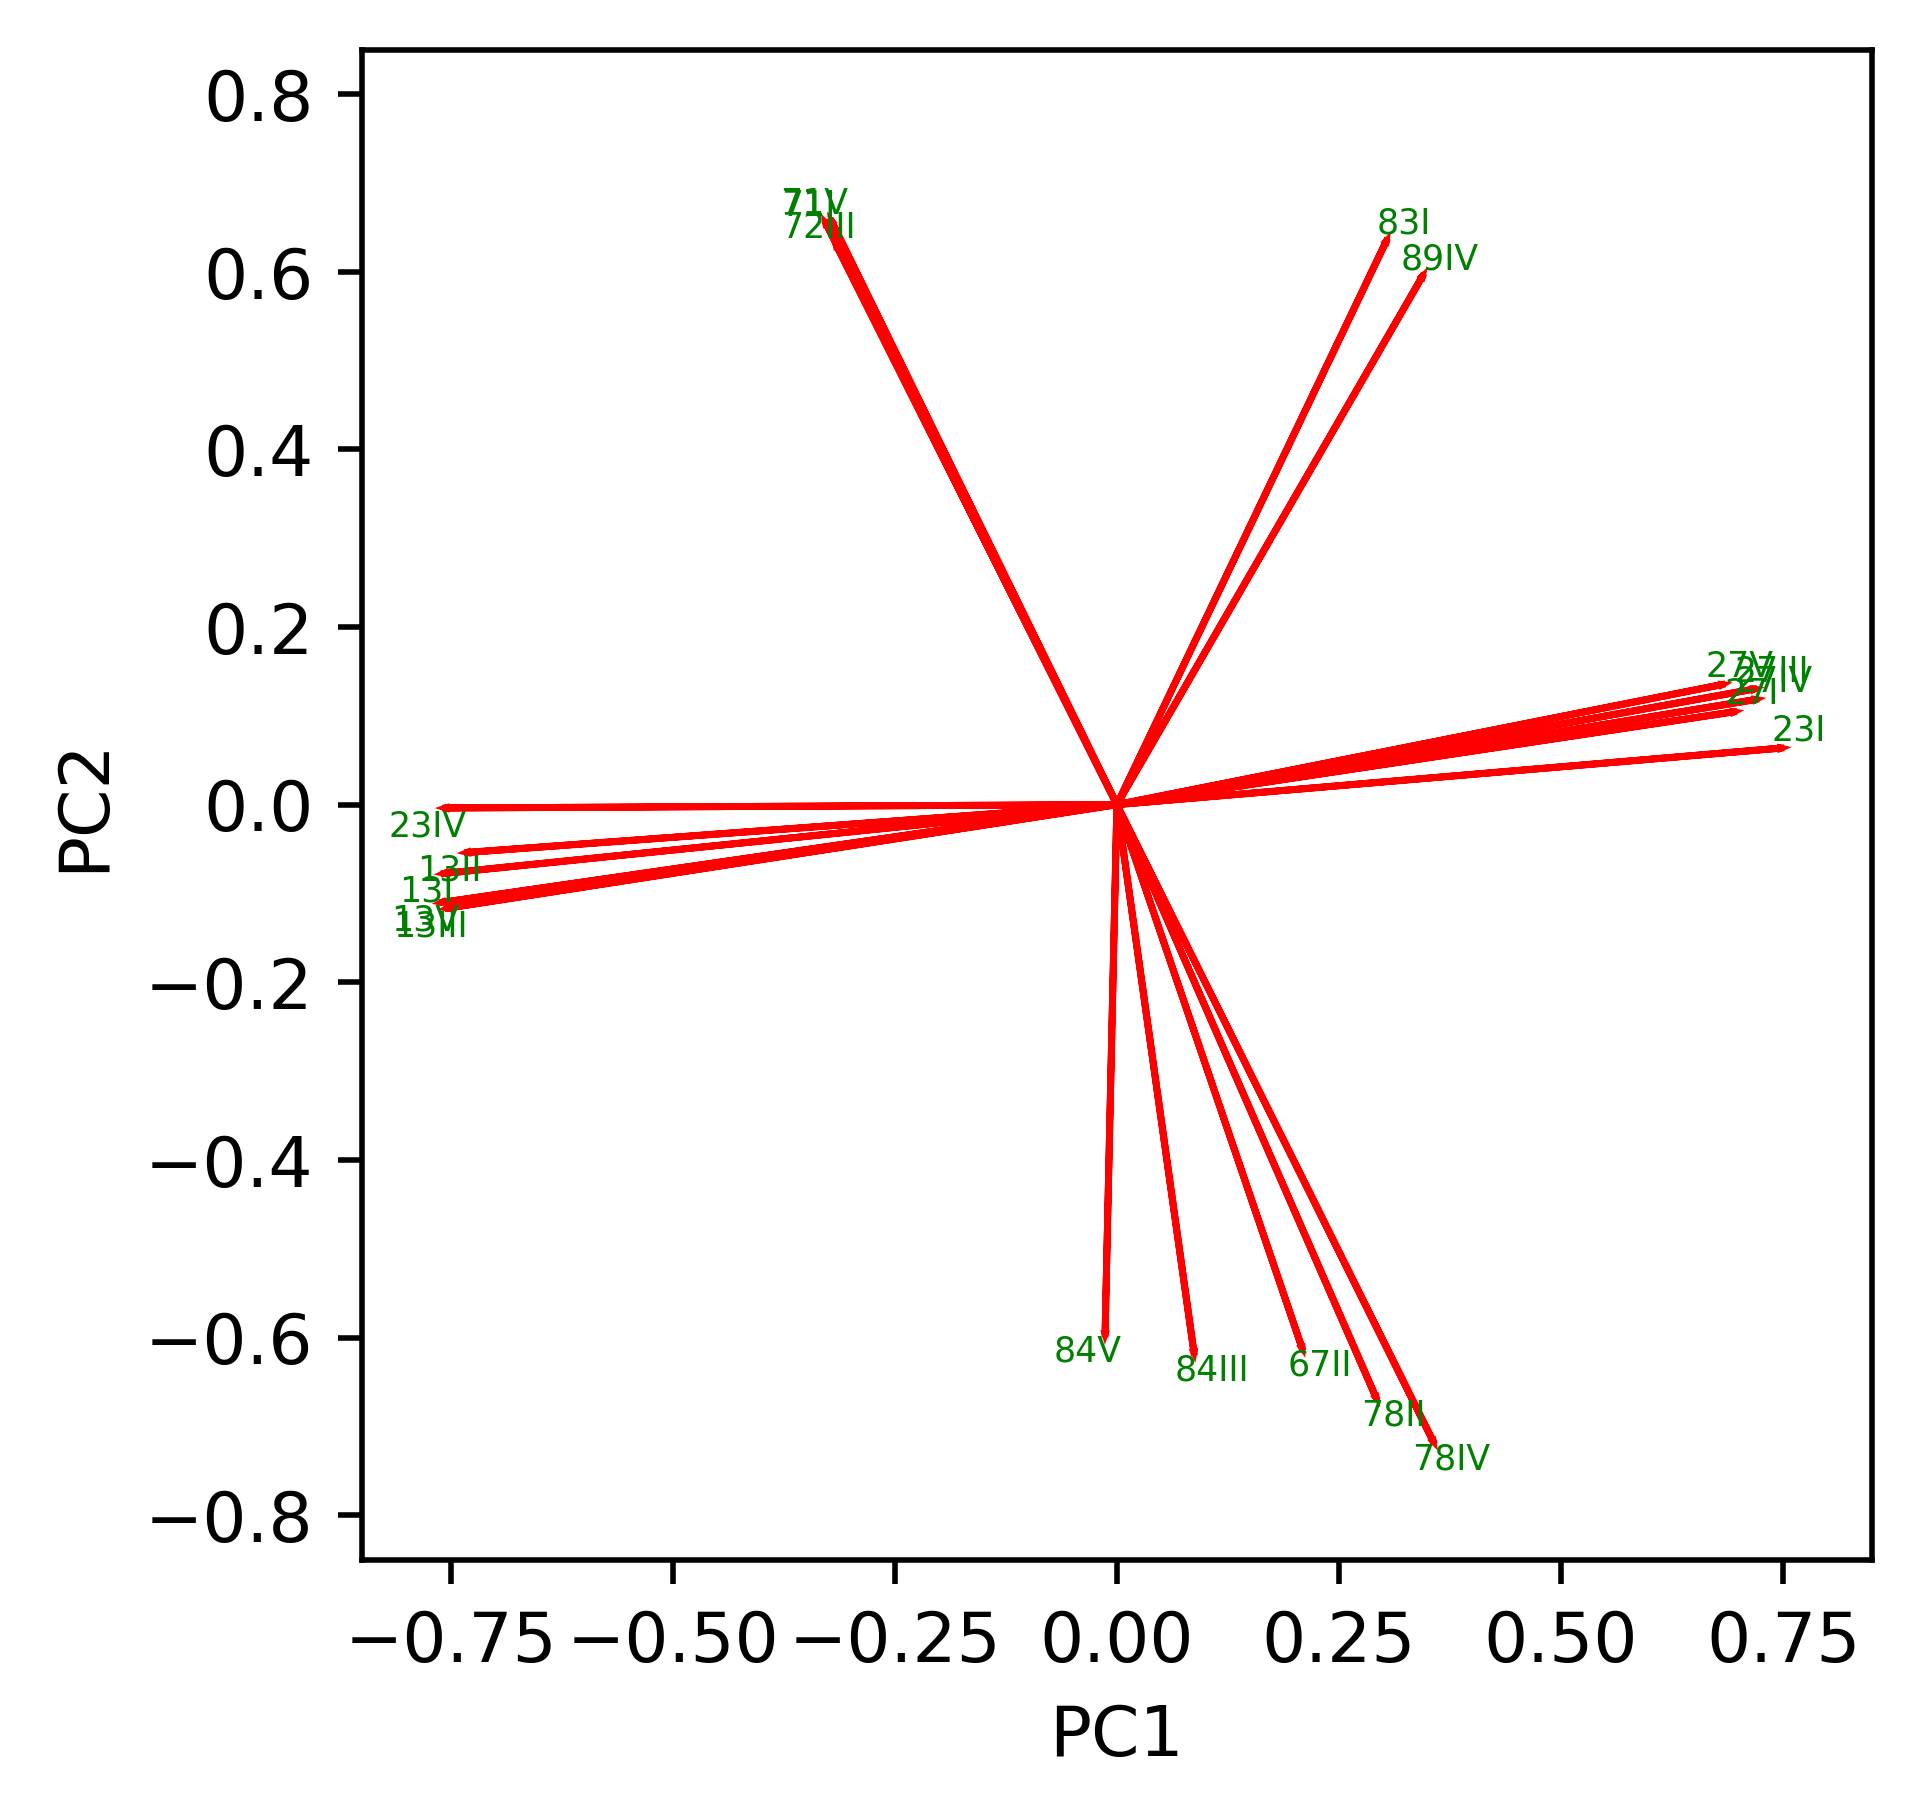

component,0,1
variable,,
Position 1IV,-0.926579,0.207110
Position 1V,-0.926579,0.207110
Position 1III,-0.926579,0.207110
Position 1I,-0.926579,0.207110
Position 7II,-0.801973,0.242863
Position 2V,-0.731243,-0.434904
Position 9IV,-0.678121,-0.115151
Position 5V,-0.575605,0.175324
Position 5III,-0.557187,0.266991


component,0,1
variable,,
Position 2III,-0.153843,-0.848544
Position 3II,-0.210392,-0.735232
Position 8II,0.310362,-0.677280
Position 4IV,-0.188725,-0.590478
Position 5I,0.260739,-0.580995
Position 6V,-0.479245,-0.559423
Position 6III,-0.479245,-0.559423
Position 6II,-0.479245,-0.559423
Position 7III,0.565960,-0.536112


/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:220: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if contributions[component1-1][i] > pc1_95 or contributions[component2-1][i] > pc2_95 or contributions[component1-1][i] < pc1_5 or contributions[component2-1][i] < pc2_5:
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:222: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0,0,contributions[component1-1][i],contributions[component2-1][i],color = 'r',width = 0.000005)
/var/folders/dz/x9x9m8n54kzcqnp47tlv3f080000gn/T/ipykernel_7073/3616705048.py:223: Future

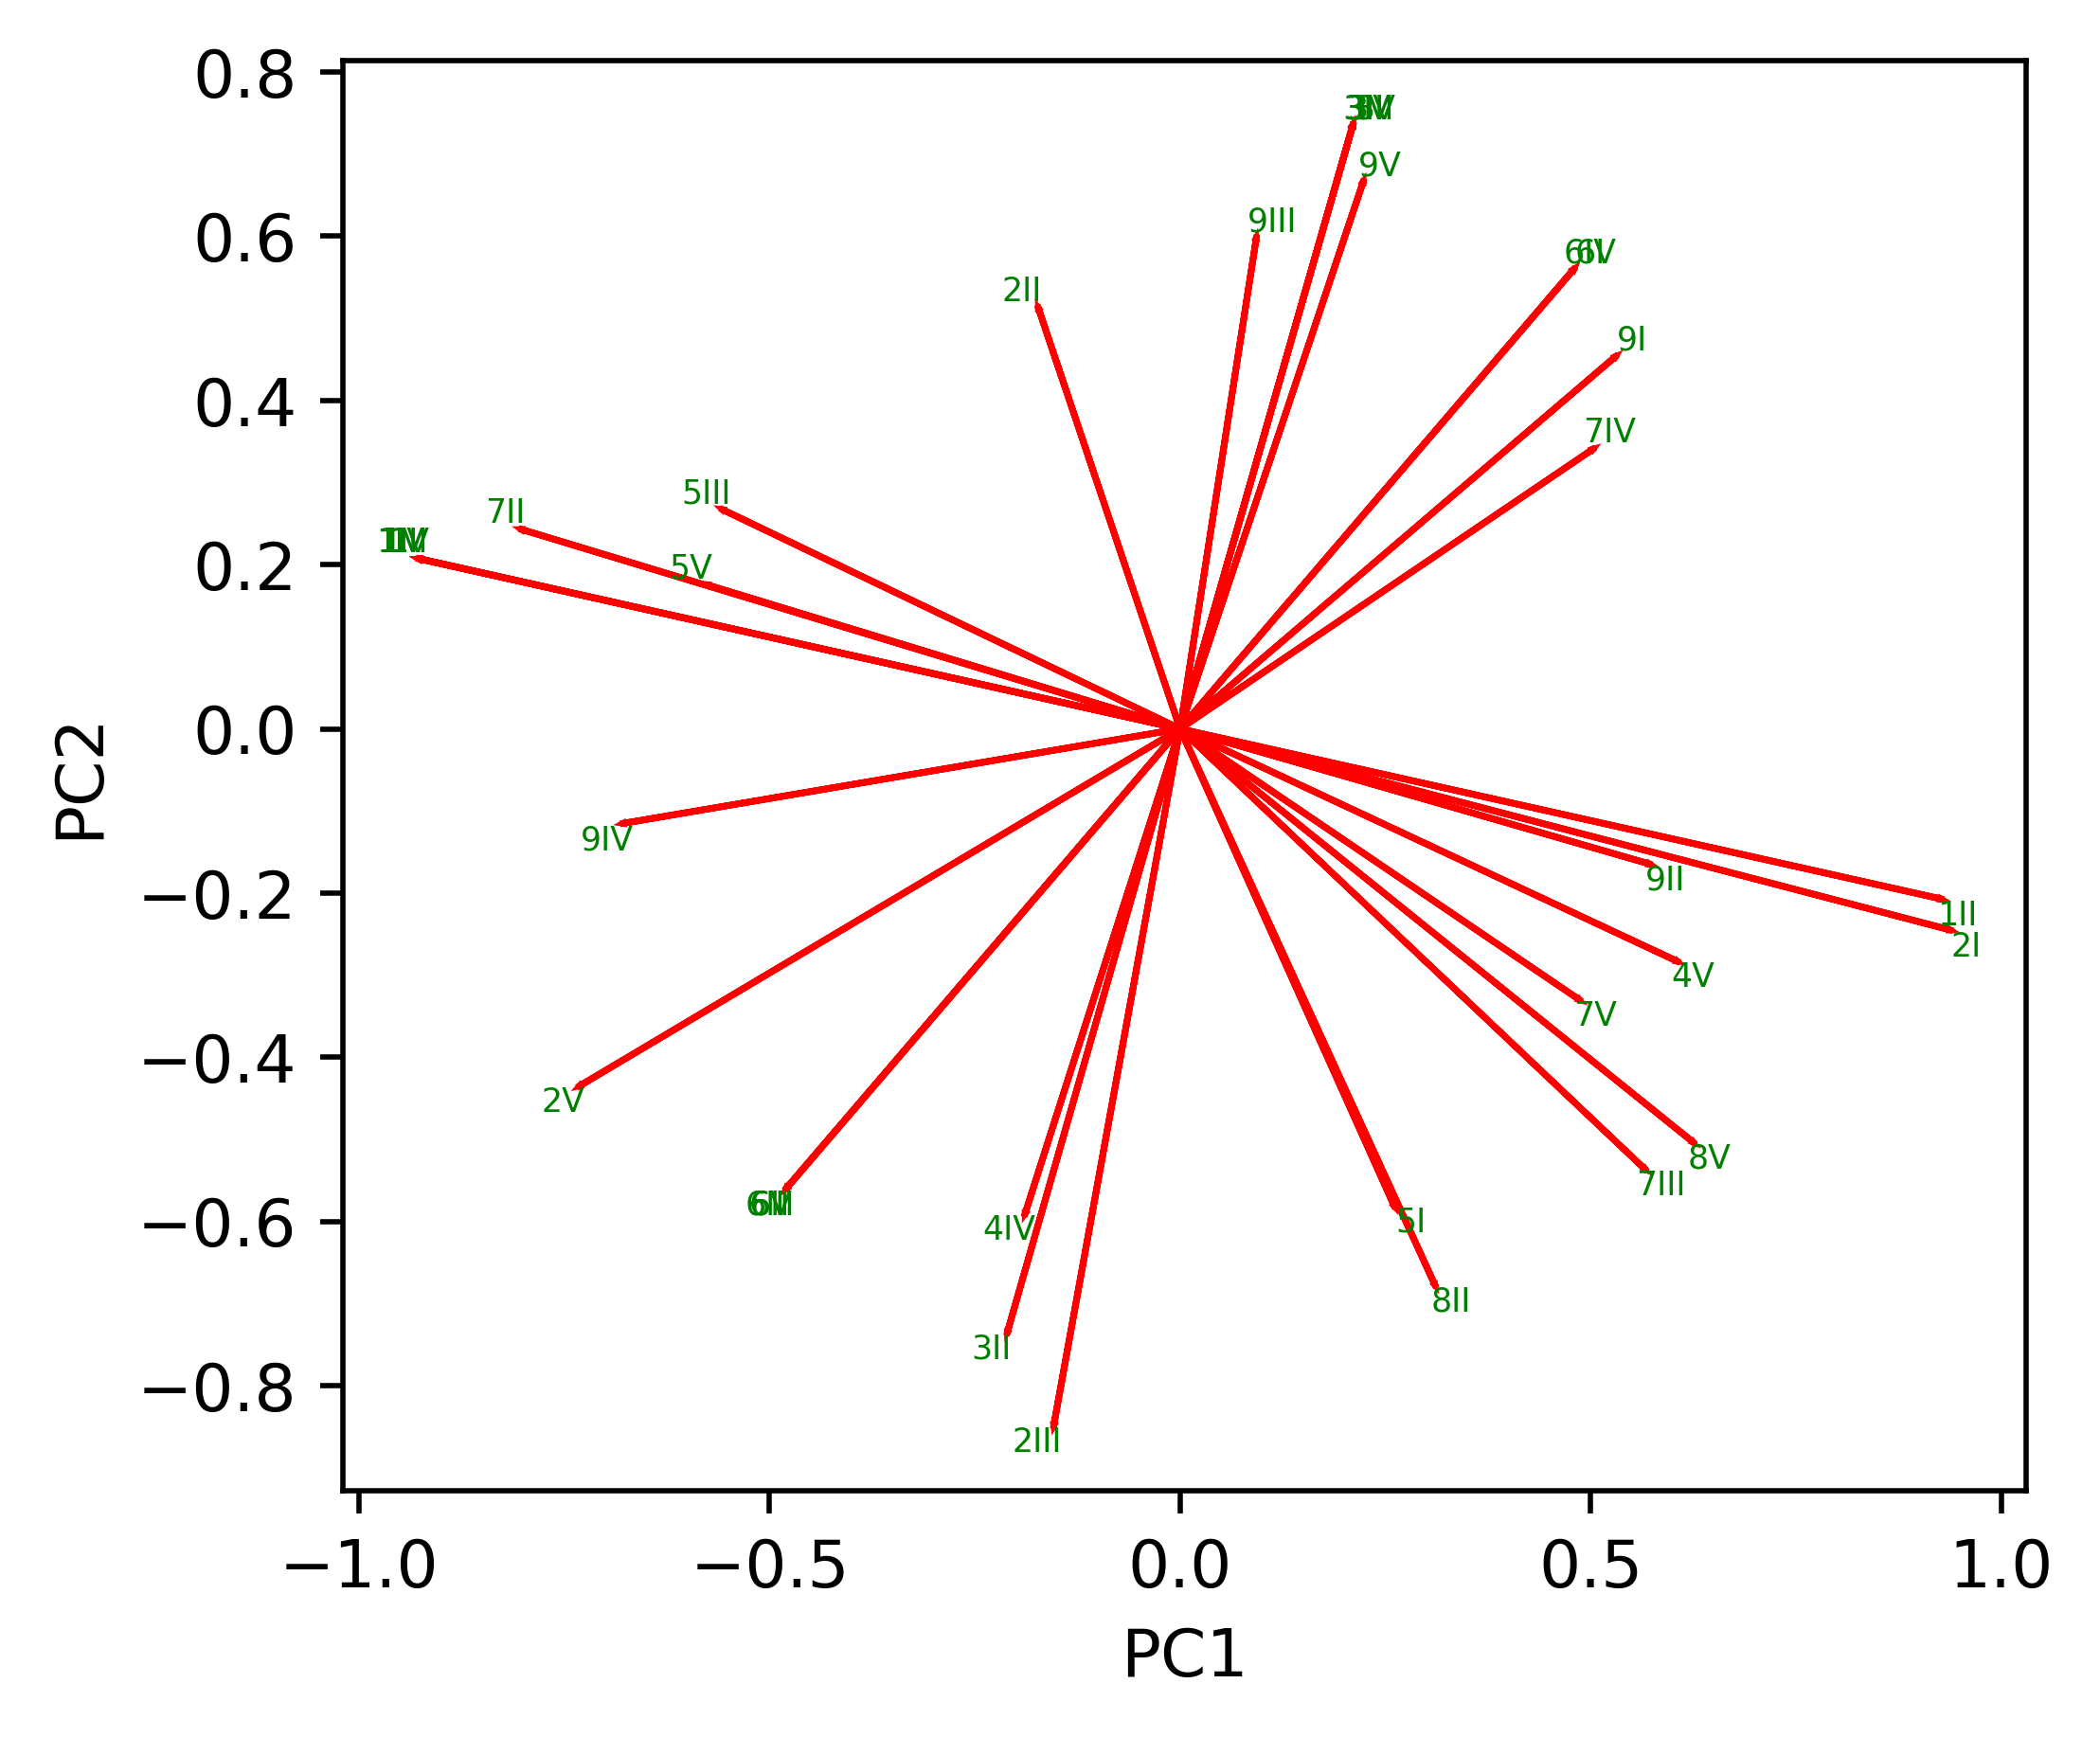

In [57]:
plt.rcParams['figure.dpi'] = 500
plt.ylim(-0.7,0.7)
plt.xlim(-0.7,0.7)
pca_prince_biplot(hexapeptide_V,1,2,True,5,percentile = 0.8)
plt.ylim(-0.85,0.85)
plt.xlim(-0.85,0.85)
pca_prince_biplot(feline_V,1,2,False,5,percentile = 0.99)
pca_prince_biplot(art_V,1,2,False,5,percentile = 0.8)